In [1]:
# Open CV

In [2]:
from matplotlib import pyplot as plt
import cv2
from IPython.display import display, Image, clear_output
import os

In [3]:
%run "~/rare_gits/video-edit/cv_helper.py"

In [4]:
%run "~/rare_gits/video-edit/filter-to-motion.py"

ic| f"Removing Video Background {video_input_file}": 'Removing Video Background in.mp4'


Unable to Open in.mp4


In [5]:
class remove_background:
    def __init__(self, base_filename, in_fps=30):
        self.base_filename = base_filename
        self.in_fps = in_fps
        self.debug_window_refresh_rate = int(
            self.in_fps / 2
        )  # every 0.5 seconds; TODO Compute
        pass

    def create(self, input_video):
        self.state = FrameState(0, 0)

    def destroy(self):
        pass

    def frame(self, idx, original_frame):
        self.state.idx = idx

        # PERF: Processing at 1/4 size boosts FPS by TK%
        in_frame = shrink_image_half(original_frame)

        # PERF: Motion Mask sampled frames
        motion_mask = to_motion_mask_fast(self.state, in_frame)

        # skip frames with no motion
        if is_frame_black(motion_mask):
            return

        # PERF - show_debug_window at on sampled frames
        if idx % self.debug_window_refresh_rate == 0:
            debug_frame = create_analyze_debug_frame(in_frame, motion_mask)
            burn_in_debug_info(debug_frame, idx, self.in_fps)
            masked_input = cv2.bitwise_and(in_frame, in_frame, mask=motion_mask)
            cv_helper.display_jupyter(masked_input)

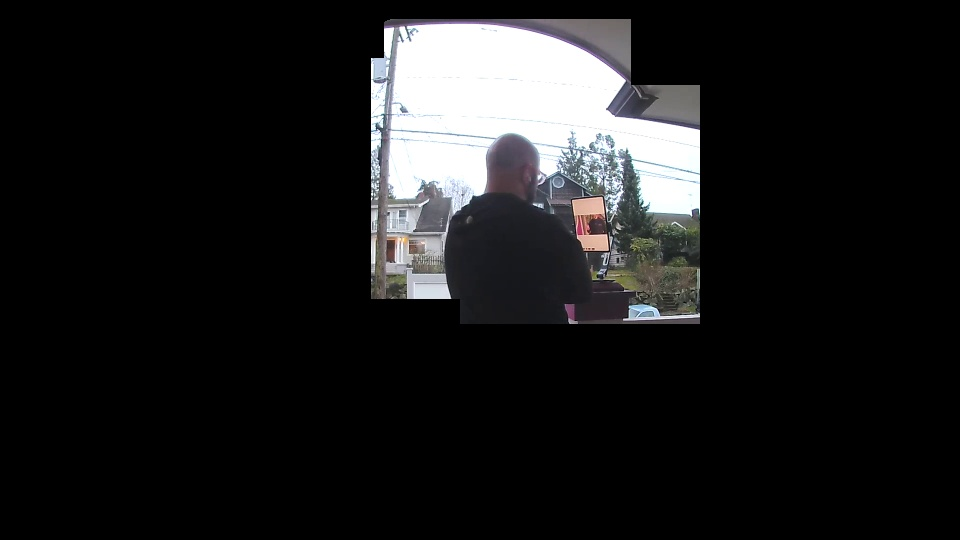

ic| int(fps.fps()): 91, int(fps.elapsed()): 10


In [6]:
input_video_path = os.path.expanduser("~/downloads/igor-magic.mp4")
input_video = cv2.VideoCapture(input_video_path)
if not input_video.isOpened():
    print(f"Unable to Open {input_video_path}")
    1 / 0

ic(f"Processing File {input_video_path}")
rb = remove_background(input_video_path, 30)
cv_helper.process_video(input_video, rb)